# Load Paper List

In [1]:
def read_papers(path):
    papers = [[]]
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                papers[-1].append(line)
            else:
                papers.append([])
    for p in papers:
        assert len(p) == 2
    return papers

In [2]:
long = read_papers("./data/long.txt")
short = read_papers("./data/short.txt")
demo = read_papers("./data/demo.txt")
student = read_papers("./data/student.txt")

# Frequency of Keywords

In [3]:
from collections import Counter
import re

counter = Counter()
for paper in long + short:
#     splitted = re.split(r' |-|\'|,|;|:|\(|\)|\?|\!|\n', paper[0].lower())
    title = (
        paper[0].lower()
        .replace(" multi-", "multi")
        .replace(" cross-", "cross")
        .replace(" representation ", " representations ")
    )
    splitted = title.split()
    counter.update(splitted)

In [4]:
counter.most_common(10)

[('for', 300),
 ('and', 147),
 ('of', 143),
 ('a', 123),
 ('with', 120),
 ('in', 104),
 ('language', 94),
 ('learning', 91),
 ('neural', 89),
 ('the', 87)]

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_deep_learning = [
    "", "deep", "learning", "neural", "network", "networks", "via", "using", "based", "towards",
    "text", "natural","language", "model", "models", "approach", "improving"
]

keywords = []
for w in counter.most_common():
    if w[0] not in stopwords.words('english') and w[0] not in stopwords_deep_learning:
        keywords.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Joohong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
keywords[:10]

[('generation', 75),
 ('translation', 66),
 ('machine', 62),
 ('dialogue', 36),
 ('graph', 35),
 ('extraction', 34),
 ('knowledge', 33),
 ('word', 31),
 ('representations', 31),
 ('question', 31)]

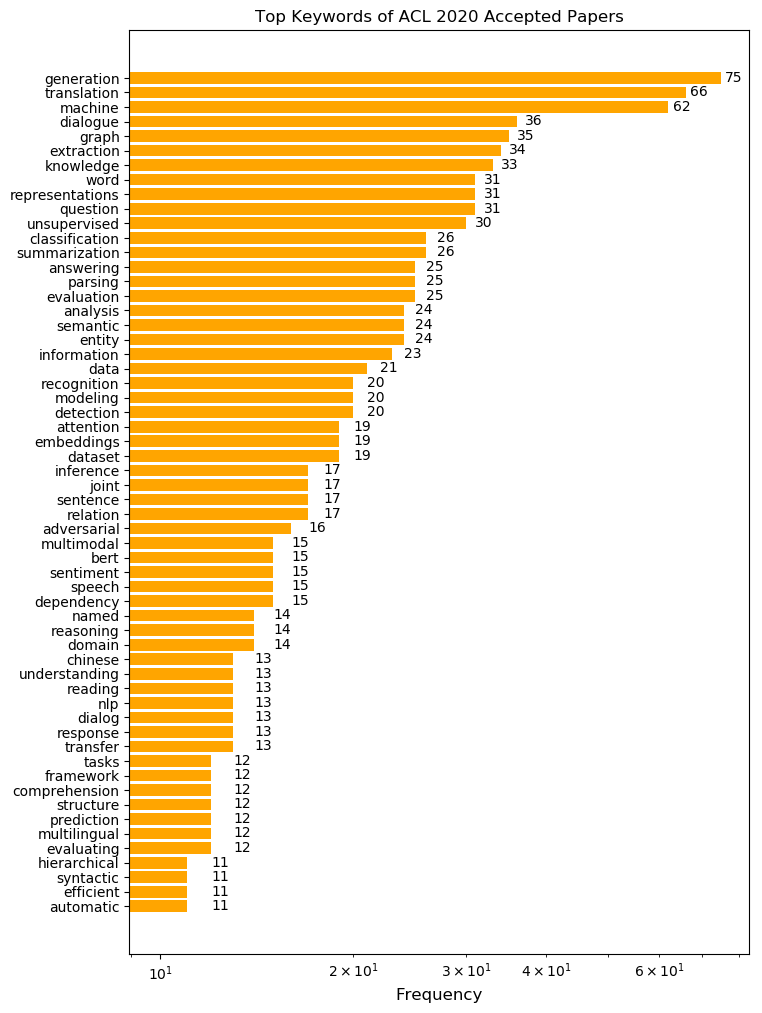

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

top_k = 58
key = [k[0] for k in keywords[:top_k]] 
value = [k[1] for k in keywords[:top_k]] 
y_pos = np.arange(len(key))

ax.barh(y_pos, value, align='center', color='orange', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 

for i, v in enumerate(value):
    ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('Top Keywords of ACL 2020 Accepted Papers', fontsize=12)

plt.show()

# Word Cloud

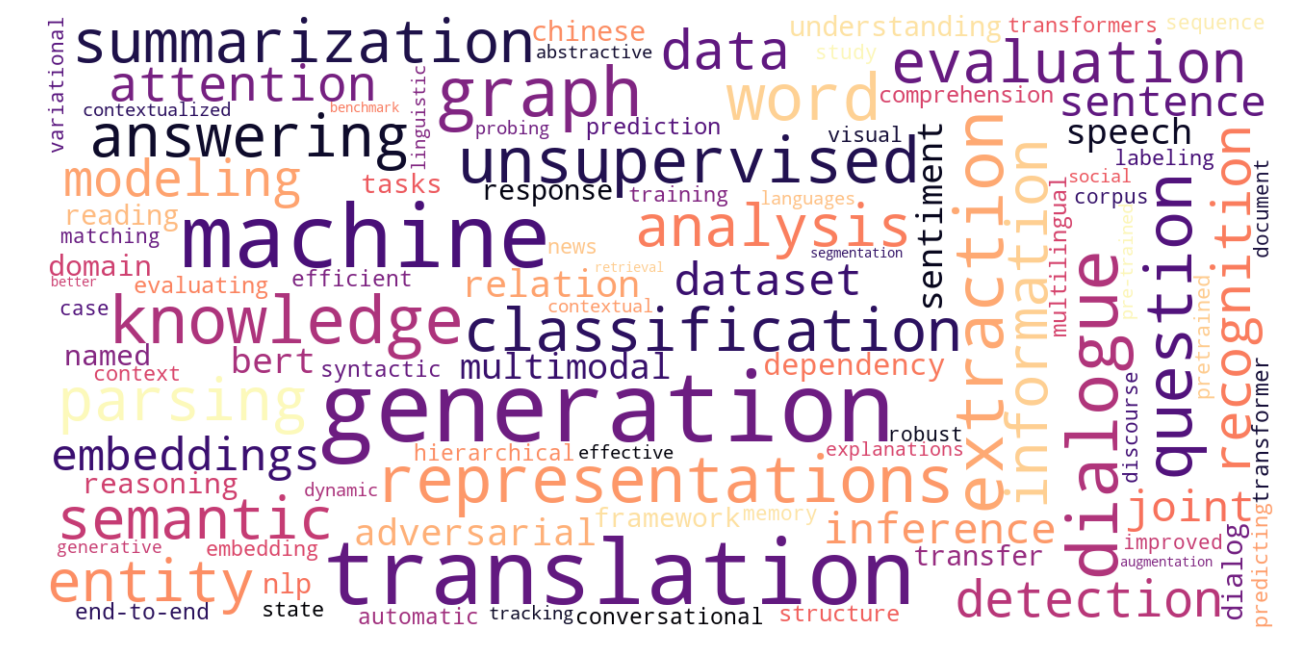

In [12]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, max_words=100, 
                      width=1280, height=640, colormap='magma',
                      background_color="white").generate_from_frequencies(dict(keywords))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()